In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [2]:
%cd /content/drive/Shareddrives/Capstone

/content/drive/Shareddrives/Capstone


In [ ]:
!pwd

/content/drive/Shareddrives/Capstone


# TACO Dataset

In [ ]:
!git clone https://github.com/pedropro/TACO.git

Cloning into 'TACO'...
remote: Enumerating objects: 740, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 740 (delta 116), reused 132 (delta 89), pack-reused 580
Receiving objects: 100% (740/740), 98.85 MiB | 13.75 MiB/s, done.
Resolving deltas: 100% (493/493), done.
Updating files: 100% (25/25), done.


In [ ]:
%cd TACO

/content/drive/Shareddrives/Capstone/TACO


In [ ]:
!python download.py

Note. If for any reason the connection is broken. Just call me again and I will start where I left.
Finished


In [ ]:
%cd /content/drive/Shareddrives/Capstone

/content/drive/Shareddrives/Capstone


## Split to train and test

In [ ]:
import os
import random
import glob
import json
import shutil
import filecmp

TEST_PATH = '/content/drive/Shareddrives/Capstone/waste_detection/workspace/images/test'
TRAIN_PATH = '/content/drive/Shareddrives/Capstone/waste_detection/workspace/images/train' 
DATA_PATH = '/content/drive/Shareddrives/Capstone/TACO/data'

### Split annotations

In [ ]:
if os.getcwd() != '/content':
    %cd /content

In [ ]:
!git clone https://github.com/akarazniewicz/cocosplit.git

Cloning into 'cocosplit'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 39 (delta 9), reused 9 (delta 4), pack-reused 11
Unpacking objects: 100% (39/39), 8.58 KiB | 732.00 KiB/s, done.


In [ ]:
!pip install -r cocosplit/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 5.2 MB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=f8bb49ebe9acf25003c4529f3f13abe0cdebe65d1675e7250d89deaf41179338
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [ ]:
!rm -rf {TRAIN_PATH}
!rm -rf {TEST_PATH}

In [ ]:
!mkdir {TRAIN_PATH}
!mkdir {TEST_PATH}

In [ ]:
TRAIN_ANN_PATH = TRAIN_PATH + '/train.json'
TEST_ANN_PATH = TEST_PATH + '/test.json'

In [ ]:
!python cocosplit/cocosplit.py --multi-class -s 0.8\
    {DATA_PATH}/annotations.json\
    {TRAIN_ANN_PATH}\
    {TEST_ANN_PATH}

Saved 3826 entries in /content/drive/Shareddrives/Capstone/waste_detection/workspace/images/train/train.json and 957 in /content/drive/Shareddrives/Capstone/waste_detection/workspace/images/test/test.json


### Split Images

In [ ]:
with open(TRAIN_ANN_PATH) as json_data:
    train_ann = json.load(json_data)
with open(TEST_ANN_PATH) as json_data:
    test_ann = json.load(json_data)

In [ ]:
train_ann['images'][0]['file_name']

'batch_1/000006.jpg'

In [ ]:
def copy_images(annotations, source_path, destination_path):
    image_file_paths = [image['file_name'] for image in annotations['images']]
    for image_file in image_file_paths:
        print(f'copying {image_file}')
        file_name = image_file.replace('/', '_')
        src = os.path.join(source_path, image_file)
        dst = os.path.join(destination_path, file_name)
        shutil.copyfile(src, dst)

In [ ]:
copy_images(train_ann, DATA_PATH, TRAIN_PATH)
copy_images(test_ann, DATA_PATH, TEST_PATH)

copying batch_1/000006.jpg
copying batch_1/000008.jpg
copying batch_1/000010.jpg
copying batch_1/000019.jpg
copying batch_1/000047.jpg
copying batch_1/000055.jpg
copying batch_1/000001.jpg
copying batch_1/000007.jpg
copying batch_1/000012.jpg
copying batch_1/000014.jpg
copying batch_1/000048.jpg
copying batch_1/000053.jpg
copying batch_1/000058.jpg
copying batch_1/000060.jpg
copying batch_1/000011.jpg
copying batch_1/000032.jpg
copying batch_1/000040.jpg
copying batch_1/000043.jpg
copying batch_1/000049.jpg
copying batch_1/000054.jpg
copying batch_1/000021.jpg
copying batch_1/000022.jpg
copying batch_1/000023.jpg
copying batch_1/000024.jpg
copying batch_1/000027.jpg
copying batch_1/000028.jpg
copying batch_1/000030.jpg
copying batch_1/000042.jpg
copying batch_1/000050.jpg
copying batch_1/000059.jpg
copying batch_1/000000.jpg
copying batch_1/000015.jpg
copying batch_1/000016.jpg
copying batch_1/000025.jpg
copying batch_1/000035.jpg
copying batch_1/000037.jpg
copying batch_1/000045.jpg
c

In [ ]:
print('train:', len(glob.glob(TRAIN_PATH + '/*')))
print('test:', len(glob.glob(TEST_PATH + '/*')))

train: 0
test: 0


In [ ]:
import copy

def change_file_name_value(annotations):
    annotations = copy.deepcopy(annotations)
    for image in annotations['images']:
        image['file_name'] = image['file_name'].replace('/', '_')
    return annotations

In [ ]:
new_test_ann = change_file_name_value(test_ann)
new_train_ann = change_file_name_value(train_ann)

In [ ]:
new_test_ann['images'][0]['file_name']

'batch_1_000008.jpg'

In [ ]:
def write_to_json(annotations, path):
    with open(path, mode='w') as f:
        json.dump(annotations, f)

In [ ]:
# rename the original file for backup
os.rename(TRAIN_ANN_PATH, TRAIN_PATH + '/train_ori.json')
os.rename(TEST_ANN_PATH, TEST_PATH + '/test_ori.json')

In [ ]:
write_to_json(new_train_ann, TRAIN_ANN_PATH)
write_to_json(new_test_ann, TEST_ANN_PATH)

## Convert to Pascal VOC XML Format

In [ ]:
!git clone https://github.com/LI-NA/coco-json-converter.git

Cloning into 'coco-json-converter'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 32 (delta 9), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (32/32), 11.35 KiB | 968.00 KiB/s, done.


In [ ]:
!rm -rf coco-json-converter

## Use the supercategory as the category name

In the `coco_to_xml.py`, on line 114,
```python
anno_list.append([cat['name'], int(box[0]), int(box[1]), int(box[0]+box[2]), int(box[1]+box[3])])
```

change `cat['name']` to `cat['supercategory']`

In [ ]:
with open('/content/coco-json-converter/coco_to_xml.py', 'r') as f:
    file_as_list = f.readlines()
with open('/content/coco-json-converter/coco_to_xml.py', 'w') as f:
    print(file_as_list[113]) # this result: "        anno_list.append([cat['name'], int(box[0]), int(box[1]), int(box[0]+box[2]), int(box[1]+box[3])])"
    file_as_list[113] = "        anno_list.append([cat['supercategory'], int(box[0]), int(box[1]), int(box[0]+box[2]), int(box[1]+box[3])])"
    f.write(''.join(file_as_list))
    print(file_as_list[113])

        anno_list.append([cat['name'], int(box[0]), int(box[1]), int(box[0]+box[2]), int(box[1]+box[3])])

        anno_list.append([cat['supercategory'], int(box[0]), int(box[1]), int(box[0]+box[2]), int(box[1]+box[3])])


## Run the converter

Example

```python coco_to_xml.py --coco_json=train.json --coco_folder=train --save_xml=train_xml --database_name=Database```

In [ ]:
!python coco-json-converter/coco_to_xml.py\
    --coco_json={TRAIN_ANN_PATH}\
    --coco_folder={TRAIN_PATH}\
    --save_xml={TRAIN_PATH}\
    --database_name=Database

loading annotations into memory...
Done (t=0.12s)
creating index...
index created!
Write annotations file...
Write xml files (1 / 1365)
Write xml files (2 / 1365)
Write xml files (3 / 1365)
Write xml files (4 / 1365)
Write xml files (5 / 1365)
Write xml files (6 / 1365)
Write xml files (7 / 1365)
Write xml files (8 / 1365)
Write xml files (9 / 1365)
Write xml files (10 / 1365)
Write xml files (11 / 1365)
Write xml files (12 / 1365)
Write xml files (13 / 1365)
Write xml files (14 / 1365)
Write xml files (15 / 1365)
Write xml files (16 / 1365)
Write xml files (17 / 1365)
Write xml files (18 / 1365)
Write xml files (19 / 1365)
Write xml files (20 / 1365)
Write xml files (21 / 1365)
Write xml files (22 / 1365)
Write xml files (23 / 1365)
Write xml files (24 / 1365)
Write xml files (25 / 1365)
Write xml files (26 / 1365)
Write xml files (27 / 1365)
Write xml files (28 / 1365)
Write xml files (29 / 1365)
Write xml files (30 / 1365)
Write xml files (31 / 1365)
Write xml files (32 / 1365)
Writ

In [ ]:
!python coco-json-converter/coco_to_xml.py\
    --coco_json={TEST_ANN_PATH}\
    --coco_folder={TEST_PATH}\
    --save_xml={TEST_PATH}\
    --database_name=Database

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
Write annotations file...
Write xml files (1 / 476)
Write xml files (2 / 476)
Write xml files (3 / 476)
Write xml files (4 / 476)
Write xml files (5 / 476)
Write xml files (6 / 476)
Write xml files (7 / 476)
Write xml files (8 / 476)
Write xml files (9 / 476)
Write xml files (10 / 476)
Write xml files (11 / 476)
Write xml files (12 / 476)
Write xml files (13 / 476)
Write xml files (14 / 476)
Write xml files (15 / 476)
Write xml files (16 / 476)
Write xml files (17 / 476)
Write xml files (18 / 476)
Write xml files (19 / 476)
Write xml files (20 / 476)
Write xml files (21 / 476)
Write xml files (22 / 476)
Write xml files (23 / 476)
Write xml files (24 / 476)
Write xml files (25 / 476)
Write xml files (26 / 476)
Write xml files (27 / 476)
Write xml files (28 / 476)
Write xml files (29 / 476)
Write xml files (30 / 476)
Write xml files (31 / 476)
Write xml files (32 / 476)
Write xml files (33 / 476)
Write xml

In [ ]:
print('train:', len(glob.glob(TRAIN_PATH + '/*')))
print('test:', len(glob.glob(TEST_PATH + '/*')))

train: 2732
test: 954


## Fix any invalid token in XML

In [ ]:
def fix_xml(path):
    xmls = glob.glob(path + '/*.xml')
    total_xmls = len(xmls)
    count = 1
    for xml_file in xmls:
        with open(xml_file, 'r') as f:
            data = f.read()
        data = data.replace('&', '&amp;')
        data = "<?xml version='1.0' encoding='utf-8'?>\n" + data
        with open(xml_file, 'w') as f:
            f.write(data)
        
        if count % 100 == 0 or count == 1 or count == total_xmls+1:
            print(f'done writing {xml_file} | {count} / {total_xmls}')
        count += 1

In [ ]:
fix_xml(TEST_PATH)

done writing /content/drive/Shareddrives/Capstone/waste_detection/workspace/images/test/batch_10_000020.xml | 100 / 476
done writing /content/drive/Shareddrives/Capstone/waste_detection/workspace/images/test/batch_11_000049.xml | 200 / 476
done writing /content/drive/Shareddrives/Capstone/waste_detection/workspace/images/test/batch_12_000078.xml | 300 / 476
done writing /content/drive/Shareddrives/Capstone/waste_detection/workspace/images/test/batch_14_000011.xml | 400 / 476


In [ ]:
fix_xml(TRAIN_PATH)

## Inspecting data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import random

from PIL import Image, ImageDraw
import xml.etree.ElementTree as ET

/content/drive/Shareddrives/Capstone/waste_detection/workspace/images/test/batch_1_000048.jpg
Bottle
[1527, 460, 1942, 1493]
Bottle
[211, 1, 628, 1418]
Carton
[863, 608, 1216, 1468]
Bottle cap
[1325, 663, 1480, 778]
Bottle cap
[610, 521, 795, 618]


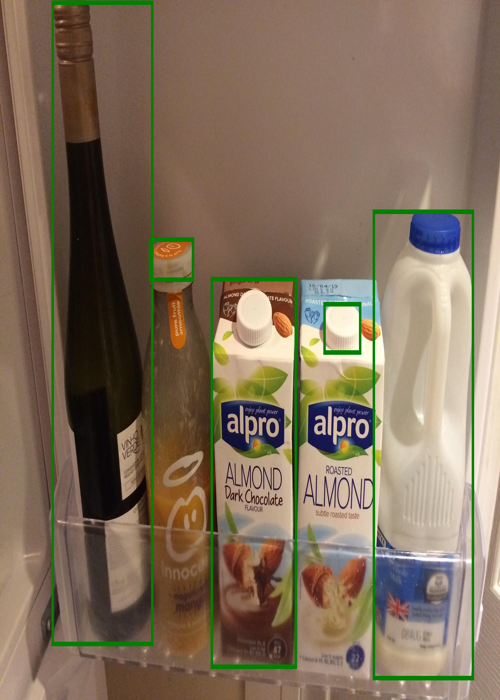

/content/drive/Shareddrives/Capstone/waste_detection/workspace/images/test/batch_14_000004.jpg
Plastic bag & wrapper
[534, 354, 3606, 2818]


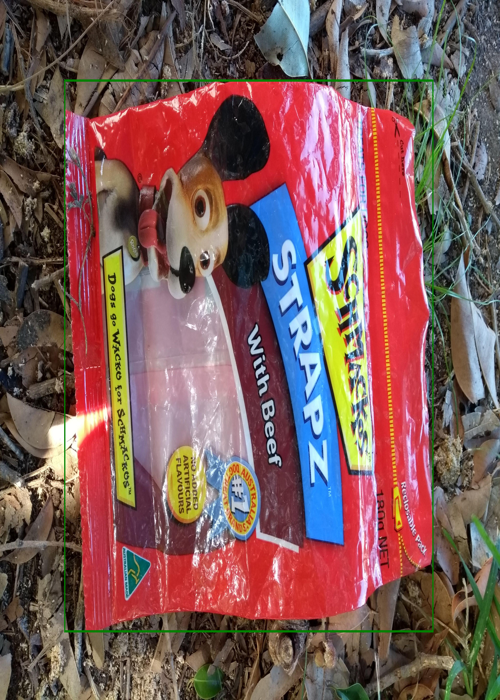

/content/drive/Shareddrives/Capstone/waste_detection/workspace/images/test/batch_10_000086.jpg
Plastic bag & wrapper
[814, 1698, 1190, 1964]
Cigarette
[1357, 2268, 1412, 2301]
Unlabeled litter
[574, 854, 599, 882]


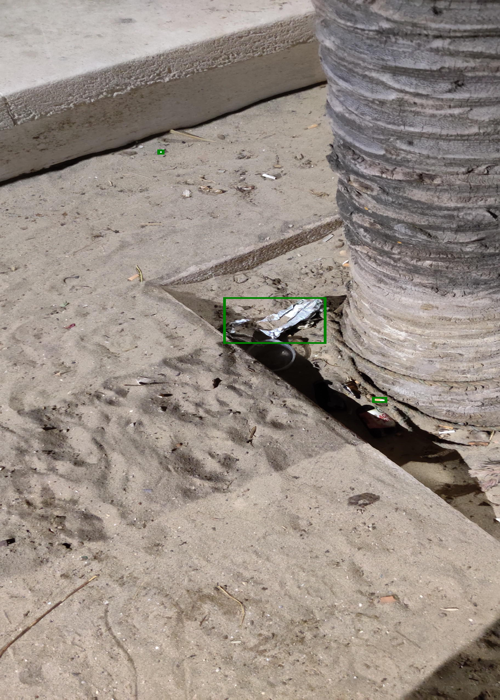

/content/drive/Shareddrives/Capstone/waste_detection/workspace/images/test/batch_14_000051.jpg
Bottle cap
[2332, 1607, 2793, 1933]


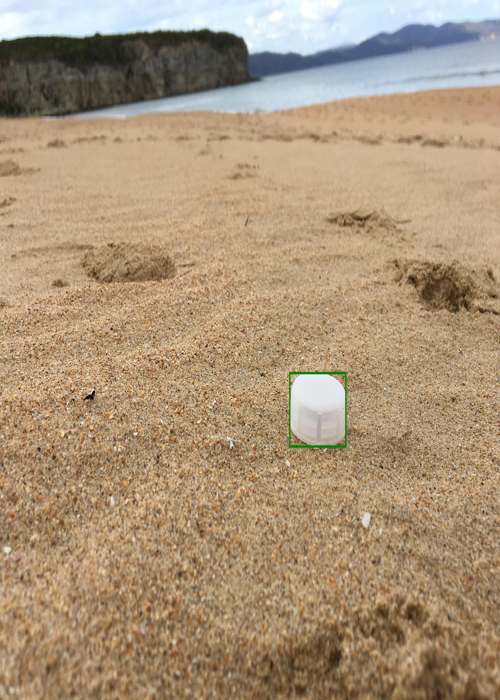

/content/drive/Shareddrives/Capstone/waste_detection/workspace/images/test/batch_1_000028.jpg
Plastic container
[351, 460, 1261, 1143]


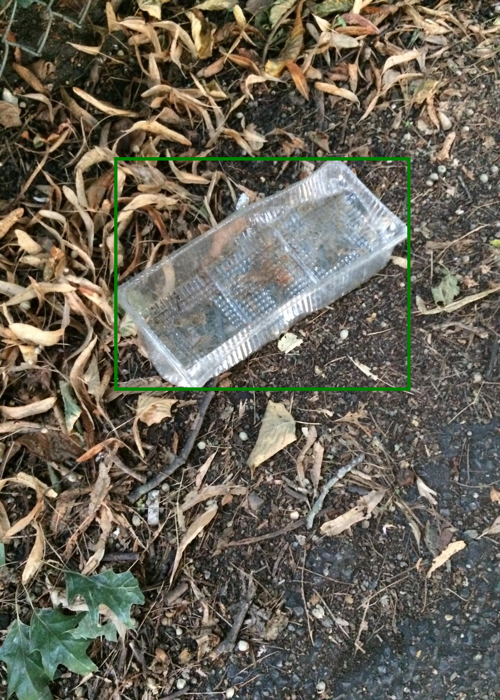

/content/drive/Shareddrives/Capstone/waste_detection/workspace/images/test/batch_11_000092.jpg
Plastic bag & wrapper
[436, 1816, 603, 1941]


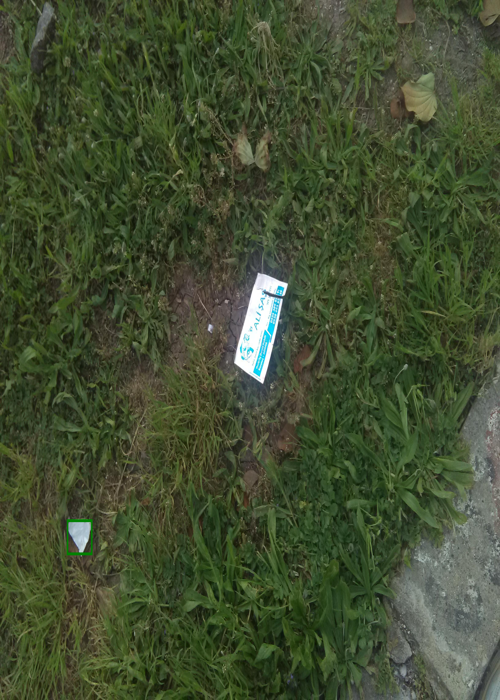

/content/drive/Shareddrives/Capstone/waste_detection/workspace/images/test/batch_14_000036.jpg
Pop tab
[1365, 1856, 1506, 2077]


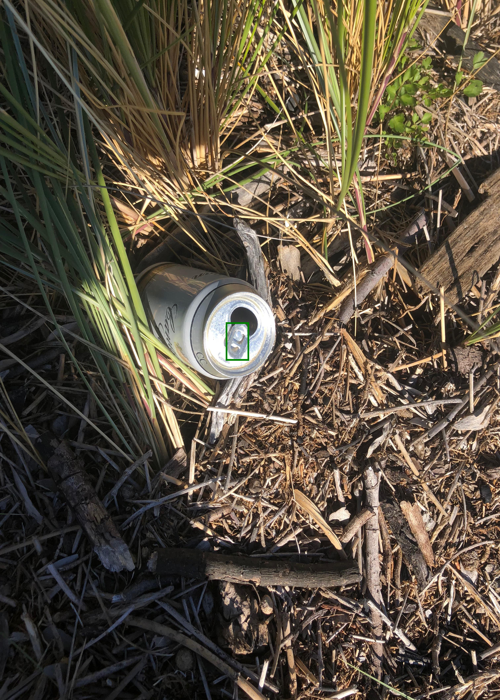

/content/drive/Shareddrives/Capstone/waste_detection/workspace/images/test/batch_10_000073.jpg
Plastic bag & wrapper
[2312, 1038, 2562, 1148]


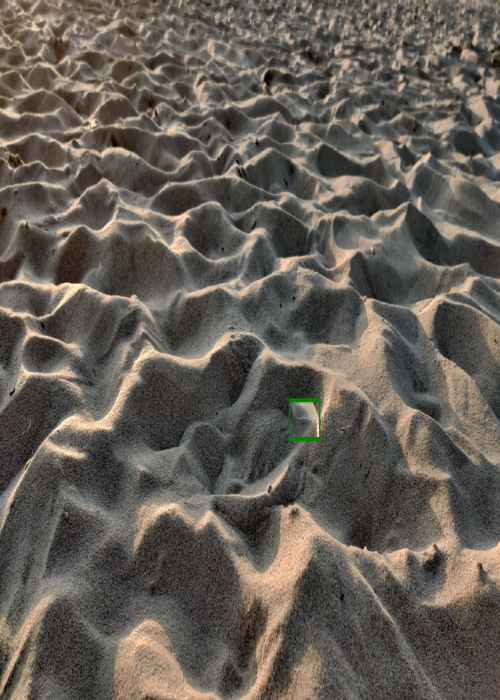

/content/drive/Shareddrives/Capstone/waste_detection/workspace/images/test/batch_11_000059.jpg
Plastic bag & wrapper
[2096, 1643, 2243, 1889]


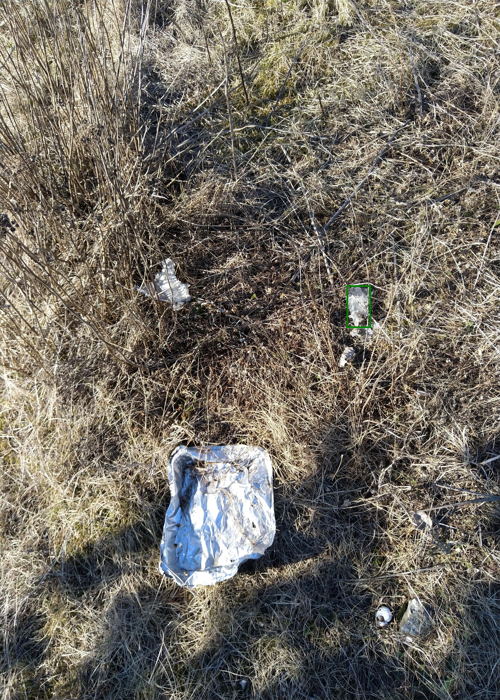

/content/drive/Shareddrives/Capstone/waste_detection/workspace/images/test/batch_14_000065.jpg
Plastic bag & wrapper
[1080, 1439, 1767, 2414]


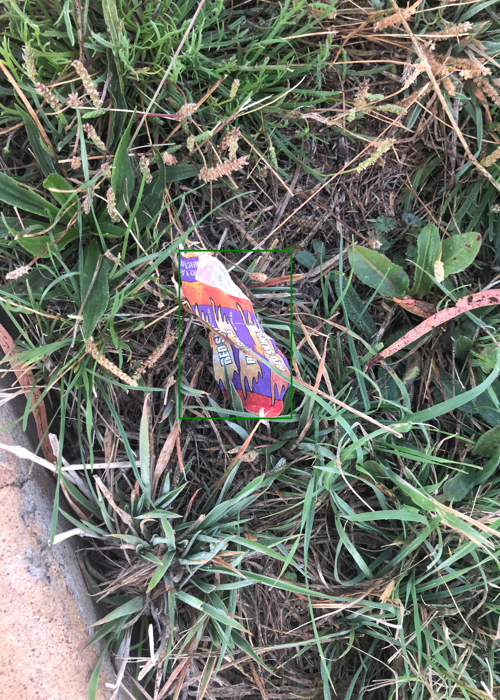

In [ ]:
image_list = glob.glob(TEST_PATH + '/*.jpg')
# print(image_list)
for i in range(10):
    idx = random.randint(0, len(image_list))
    sample_image = Image.open(image_list[idx])

    tree = ET.parse(image_list[idx].replace('.jpg', '.xml'))
    root = tree.getroot()
    sample_annotations = []
    for neighbor in root.iter('bndbox'):
        xmin = int(neighbor.find('xmin').text)
        ymin = int(neighbor.find('ymin').text)
        xmax = int(neighbor.find('xmax').text)
        ymax = int(neighbor.find('ymax').text)
        sample_annotations.append([xmin, ymin, xmax, ymax])
    
    sample_image_annotated = sample_image.copy()
    img_bbox = ImageDraw.Draw(sample_image_annotated)
    for bbox in sample_annotations:
        print(bbox)
        img_bbox.rectangle(bbox, outline="green") 
    
    sample_image_annotated
# sample_image = Image.open('/content/drive/Shareddrives/Capstone/waste_detection/workspace/images/test/batch_10_000000.jpg')
# sample_image